# PLS regression analysis for EP DTI and clinical data

- Project:        HCP-EP
- File Name:      EP_PLS
- Author:         Haley Wang
- Date Created:   2023-07-10
- Last Modified:  2023-07-10
- Code Status:    Finished

In [1]:
import numpy as np
import pandas as pd
import pyls
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from netneurotools import datasets, stats, plotting
from scipy.stats import zscore, pearsonr, ttest_ind
from scipy.spatial.distance import squareform, pdist

In [2]:
from IPython.display import display, Javascript

def beep():
    display(Javascript('new Audio("https://www.soundjay.com/buttons/sounds/button-09a.mp3").play()'))

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option('all')

In [2]:
"""
load data (age and sex were regressed out)
"""

df = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_MEND_Replication/EP_PLS_all.csv')


In [3]:
for column in df.columns:
    print(column)

src_subject_id
sex
age_demeaned
age_quad_demeaned
dup
med_equiv_current
cohort
dx_code
dx
FA_Middle cerebellar peduncle
FA_Pontine crossing tract
FA_Genu of corpus callosum
FA_Body of corpus callosum
FA_Splenium of corpus callosum
FA_Fornix
FA_Corticospinal tract R
FA_Corticospinal tract L
FA_Medial lemniscus R
FA_Medial lemniscus L
FA_Inferior cerebellar peduncle R
FA_Inferior cerebellar peduncle L
FA_Superior cerebellar peduncle R
FA_Superior cerebellar peduncle L
FA_Cerebral peduncle R
FA_Cerebral peduncle L
FA_Anterior limb of internal capsule R
FA_Anterior limb of internal capsule L
FA_Posterior limb of internal capsule R
FA_Posterior limb of internal capsule L
FA_Retrolenticular part of internal capsule R
FA_Retrolenticular part of internal capsule L
FA_Anterior corona radiata R
FA_Anterior corona radiata L
FA_Superior corona radiata R
FA_Superior corona radiata L
FA_Posterior corona radiata R
FA_Posterior corona radiata L
FA_Posterior thalamic radiation R
FA_Posterior thalamic r

In [6]:
"""
Create X and Y for PLS
"""
predictor_cleaned =  df.filter(regex='^(FA|MD|AD|RD)')
response_cleaned = df.filter(regex='^(pos|neg|gps|ymrs)')

In [7]:
response_cleaned.columns = ['PANSS_Delusions', 'PANSS_Conceptual Disorganization', 'PANSS_Hallucinations', 'PANSS_Excitement', 'PANSS_Grandiosity', 
                            'PANSS_Suspiciousness/Persecution', 'PANSS_Hostility', 'PANSS_Blunted Affect', 'PANSS_Emotional Withdrawal', 'PANSS_Poor Rapport', 
                            'PANSS_Social Withdrawal', 'PANSS_Difficulty in abstract thinking', 'PANSS_Lack of Spontaneity', 'PANSS_Stereotyped Thinking', 
                            'PANSS_Somatic Concern', 'PANSS_Anxiety', 'PANSS_Guilt feeling', 'PANSS_Tension', 
                            'PANSS_Mannerisms and Posturing', 'PANSS_Depression', 'PANSS_Motor Retardation', 'PANSS_Uncooperativeness', 'PANSS_Unusual Thought Content', 
                            'PANSS_Disorientation', 'PANSS_Poor Attention', 'PANSS_Lack of Judgement and Insight', 'PANSS_Disturbance of Volition', 'PANSS_Poor Impulse Control', 
                            'PANSS_Preoccupation', 'PANSS_Active Social Avoidance', 
                            
                            'YMRS_Elevated Mood', 'YMRS_Increased Motor Activity-Energy', 'YMRS_Sexual Interest', 'YMRS_Sleep', 'YMRS_Irritability', 'YMRS_Speech', 
                            'YMRS_Language-Thought Disorder', 'YMRS_Content', 'YMRS_Disruptive-Aggressive Behavior', 'YMRS_Appearance', 'YMRS_Insight']

In [2]:
"""
behavioral PLS
"""
X = zscore(predictor_cleaned)
Y = zscore(response_cleaned)

NameError: name 'zscore' is not defined

In [1]:
X.shape()

NameError: name 'X' is not defined

In [27]:
pls_result = pyls.behavioral_pls(X, Y, n_boot=5000, n_perm=5000, n_split=0, 
                                 test_split=0, covariance=False, rotate=True, 
                                 ci=95, verbose=True, n_proc='max')

Running permutations:   1%|2                             | 36/5000 | 00:00<01:55/u/home/h/haleywan/.conda/envs/analysis/lib/python3.10/site-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
Running permutations:   1%|4                             | 72/5000 | 00:03<04:06/u/home/h/haleywan/.conda/envs/analysis/lib/python3.10/site-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. 

In [36]:
pyls.save_results('EP_pls_result.hdf5', pls_result)

'EP_pls_result.hdf5'

In [28]:
pls_result.permres.pvals

array([1.99960008e-04, 1.44571086e-01, 6.23875225e-02, 1.84563087e-01,
       1.51769646e-01, 6.24875025e-01, 3.68526295e-01, 5.73285343e-01,
       9.26614677e-01, 8.32033593e-01, 9.74605079e-01, 5.42491502e-01,
       9.71605679e-01, 9.52209558e-01, 9.98800240e-01, 9.94001200e-01,
       9.97200560e-01, 9.98400320e-01, 9.92601480e-01, 9.98600280e-01,
       1.00000000e+00, 1.00000000e+00, 9.99800040e-01, 1.00000000e+00,
       9.99800040e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

In [29]:
pls_result.varexp

array([3.85631001e-01, 1.48968818e-01, 9.00260889e-02, 6.71680256e-02,
       4.80832661e-02, 3.55596559e-02, 2.76090082e-02, 2.29595410e-02,
       1.95210259e-02, 1.90986324e-02, 1.58525802e-02, 1.49226863e-02,
       1.29501280e-02, 1.00827331e-02, 9.35510509e-03, 8.07407585e-03,
       7.74680970e-03, 7.00422234e-03, 5.75636587e-03, 5.10190290e-03,
       4.56206499e-03, 3.84912376e-03, 3.64879564e-03, 3.29493376e-03,
       2.97676894e-03, 2.63323935e-03, 2.51383687e-03, 2.27541031e-03,
       1.94675842e-03, 1.81002723e-03, 1.63837121e-03, 1.37719278e-03,
       1.26102538e-03, 1.14571763e-03, 8.29357349e-04, 7.11635114e-04,
       6.44371106e-04, 4.63954532e-04, 4.60960247e-04, 2.78143793e-04,
       2.06639526e-04])

In [30]:
"""
loadings - neural
"""
xload = pyls.behavioral_pls(Y, X, n_boot=3000, n_perm=0, test_split=0)

In [35]:
pyls.save_results('EP_pls_loadings.hdf5', xload)

'EP_pls_loadings.hdf5'

In [31]:
lv = 0 # latent variable
beep()

<IPython.core.display.Javascript object>

In [32]:
# Assessing contribution of variables within a dimension
effect_size = pow(xload["y_loadings"][:, lv],2)
std_effect_size = zscore(effect_size)
relidx = abs(std_effect_size) > 2

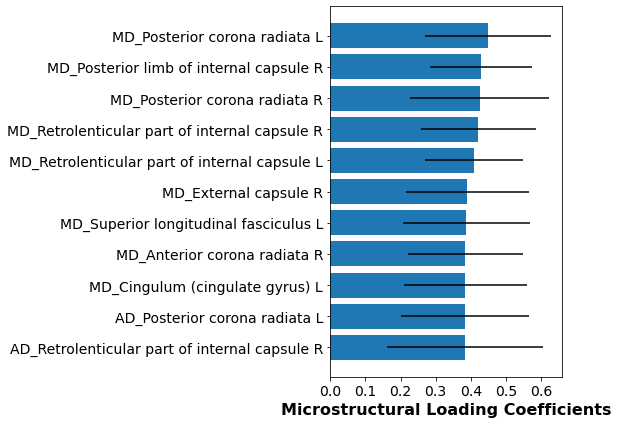

In [33]:
err = (xload["bootres"]["y_loadings_ci"][:, lv, 1]
      - xload["bootres"]["y_loadings_ci"][:, lv, 0]) / 2
#relidx = (abs(xload["y_loadings"][:, lv]) - err) > 0.16 # CI doesnt cross 0 , LV 0 - 0.265; LV1 - 0.1395, LV2 - 0.1365
sorted_idx = np.argsort(xload["y_loadings"][relidx, lv])

# Extract column names as a list
diffusion_idx = predictor_cleaned.columns.tolist()

#plot the figure
plt.figure(figsize=(8,6))
plt.ion()

#plt.bar(np.sort(xload["y_loadings"][relidx, lv]), np.arange(sum(relidx)), yerr=err[relidx][sorted_idx])
plt.barh(np.arange(sum(relidx)), np.sort(xload["y_loadings"][relidx, lv]), xerr=err[relidx][sorted_idx], align='center')
#plt.barh(np.arange(0,10), loadings, xerr=err[relidx][sorted_idx], align='center')
plt.yticks(np.arange(sum(relidx)), labels=predictor_cleaned.columns[relidx][sorted_idx],
           rotation='horizontal', fontsize=14)
plt.xticks(fontsize=14)
#plt.yticks(np.arange(0,10), labels=predictor_cleaned.columns[relidx][sorted_idx],
#           rotation='horizontal')
plt.xlabel("Microstructural Loading Coefficients", fontsize=16, fontweight="bold")
plt.tight_layout()
#plt.savefig("/u/project/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_ROI_Analysis/figures/bar_pls_lv0_nload.tiff")

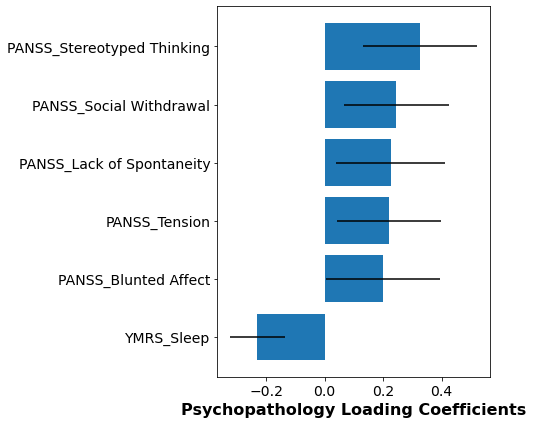

In [34]:
"""
loadings - psychopathology
"""

err = (pls_result["bootres"]["y_loadings_ci"][:, lv, 1]
      - pls_result["bootres"]["y_loadings_ci"][:, lv, 0]) / 2
relidx = (abs(pls_result["y_loadings"][:, lv]) - err) > 0  # CI doesnt cross 0
sorted_idx = np.argsort(pls_result["y_loadings"][relidx, lv])
plt.figure(figsize=(7,6))
plt.ion()
plt.barh(np.arange(sum(relidx)), np.sort(pls_result["y_loadings"][relidx, lv]), 
         xerr=err[relidx][sorted_idx], align='center')
plt.yticks(np.arange(sum(relidx)), labels=response_cleaned.columns[relidx][sorted_idx],
           rotation='horizontal', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Psychopathology Loading Coefficients", fontsize=16, fontweight="bold")
plt.tight_layout()
#plt.savefig("/u/project/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_ROI_Analysis/figures/bar_pls_lv1_pload.tiff")

In [22]:
## for visualization

## export the list of ROI loadings with significant contributions
ROIs = predictor_cleaned.columns[relidx][sorted_idx].tolist()
ROIs

['AD_Retrolenticular part of internal capsule R',
 'AD_Posterior corona radiata L',
 'MD_Cingulum (cingulate gyrus) L',
 'MD_Anterior corona radiata R',
 'MD_Superior longitudinal fasciculus L',
 'MD_External capsule R',
 'MD_Retrolenticular part of internal capsule L',
 'MD_Retrolenticular part of internal capsule R',
 'MD_Posterior corona radiata R',
 'MD_Posterior limb of internal capsule R',
 'MD_Posterior corona radiata L']

In [26]:
coefs = xload["y_loadings"][relidx, lv].tolist()
coefs

[0.4295165395288213,
 0.420924624353945,
 0.4088104731358311,
 0.38416621366340536,
 0.4246217559039047,
 0.44760631077411084,
 0.3896462421353912,
 0.38362189943595304,
 0.38700789491315285,
 0.3832368591919641,
 0.38344460841642564]

In [28]:
# put them together as a df
chart = pd.DataFrame({'ROIs': ROIs, 'Coefs': coefs})

# Make the coeeficients absolute values
chart['Coefs'] = chart['Coefs'].abs()
chart = chart.sort_values(by='Coefs', ascending=False)

# Remove the suffix of everything in front of the underscore
chart['ROIs'] = chart['ROIs'].str.split('_', expand=True).iloc[:, 1]
chart = chart.reset_index()

# Remove the repetative ROIs and keep the largest coefs
chart = chart.drop_duplicates(subset='ROIs', keep='first')
chart['ROIs'] = chart['ROIs'].str.replace(' ', '_')
chart


index                                        ROIs     Coefs
0       5                          External_capsule_R  0.447606
1       0  Retrolenticular_part_of_internal_capsule_R  0.429517
2       4          Superior_longitudinal_fasciculus_L  0.424622
3       1                  Posterior_corona_radiata_L  0.420925
4       2                Cingulum_(cingulate_gyrus)_L  0.408810
5       6  Retrolenticular_part_of_internal_capsule_L  0.389646
6       8                  Posterior_corona_radiata_R  0.387008
7       3                   Anterior_corona_radiata_R  0.384166
10      9        Posterior_limb_of_internal_capsule_R  0.383237

In [29]:
chart.to_csv('EP_loading_chart_for_vis.csv', index=False)